# importation of the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,roc_curve,auc,precision_recall_curve,RocCurveDisplay,classification_report
from sklearn.ensemble import  GradientBoostingClassifier,StackingClassifier,VotingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# loading the Dataset

In [3]:
df = pd.read_csv(r'C:\Users\GASTO\Documents\fraud_data.csv')

# display of fraud data.
- the first 5 rows of the data for better understanding and general overview


In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


# Data preprocessing & preparing Datasets

In [ ]:
# checking for missingness
df.isnull().sum()

there was no missingness from our data

In [ ]:
# checking info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21693 entries, 0 to 21692
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      21693 non-null  float64
 1   V2      21693 non-null  float64
 2   V3      21693 non-null  float64
 3   V4      21693 non-null  float64
 4   V5      21693 non-null  float64
 5   V6      21693 non-null  float64
 6   V7      21693 non-null  float64
 7   V8      21693 non-null  float64
 8   V9      21693 non-null  float64
 9   V10     21693 non-null  float64
 10  V11     21693 non-null  float64
 11  V12     21693 non-null  float64
 12  V13     21693 non-null  float64
 13  V14     21693 non-null  float64
 14  V15     21693 non-null  float64
 15  V16     21693 non-null  float64
 16  V17     21693 non-null  float64
 17  V18     21693 non-null  float64
 18  V19     21693 non-null  float64
 19  V20     21693 non-null  float64
 20  V21     21693 non-null  float64
 21  V22     21693 non-null  float64
 22

# descriptive statastics 

In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,...,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000
mean,-0.032403,0.047565,-0.091623,0.057805,-0.033983,-0.023207,-0.074203,0.002096,-0.044311,-0.091073,...,0.012471,0.003743,-0.001662,-0.002446,-0.000406,0.002367,0.001514,0.003203,86.776247,0.016411
std,2.106997,1.690911,1.870289,1.540329,1.530508,1.340599,1.596775,1.412650,1.158554,1.354886,...,0.850009,0.741348,0.629987,0.600144,0.520949,0.478279,0.424688,0.302048,235.644479,0.127052
min,-41.928738,-40.803981,-31.103685,-4.848504,-32.092129,-20.367836,-41.506796,-38.987263,-13.434066,-24.403185,...,-21.453736,-8.887017,-21.303666,-2.766638,-4.541819,-1.855355,-7.764147,-6.520075,0.000000,0.000000
25%,-0.929371,-0.592921,-0.962975,-0.850069,-0.698296,-0.779041,-0.565297,-0.205943,-0.669752,-0.554596,...,-0.225142,-0.538258,-0.162395,-0.356356,-0.317296,-0.326141,-0.069938,-0.053334,5.370000,0.000000
50%,0.007545,0.075215,0.176534,-0.012868,-0.063948,-0.281565,0.030859,0.023159,-0.073996,-0.099291,...,-0.024133,0.007273,-0.012327,0.036878,0.011561,-0.044870,0.002475,0.011765,21.950000,0.000000
75%,1.315678,0.819749,1.020809,0.772388,0.615287,0.383633,0.563751,0.328411,0.590212,0.445474,...,0.192954,0.530333,0.146616,0.431931,0.354043,0.238629,0.095859,0.081749,76.480000,0.000000
max,2.451888,21.467203,4.069865,12.114672,29.162172,21.393069,34.303177,20.007208,9.125535,12.701538,...,27.202839,8.361985,15.626067,4.014444,5.541598,3.463246,9.879903,9.876371,7712.430000,1.000000


In [4]:
df['Class'].value_counts()

Class
0    21337
1      356
Name: count, dtype: int64

VISUALIZATION

Text(0.5, 1.0, 'class distribution in total count')

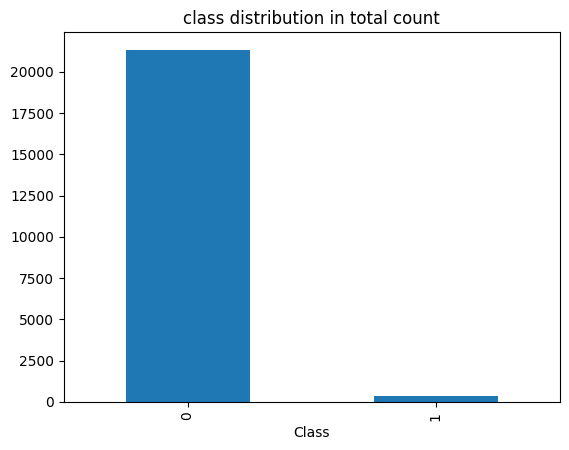

In [ ]:
df['Class'].value_counts().plot(kind='bar')
plt.title('class distribution in total count')

In [ ]:
perce = df.groupby("Class")["Class"].count() / df["Class"].count() * 100
perce

Class
0    98.358918
1     1.641082
Name: Class, dtype: float64

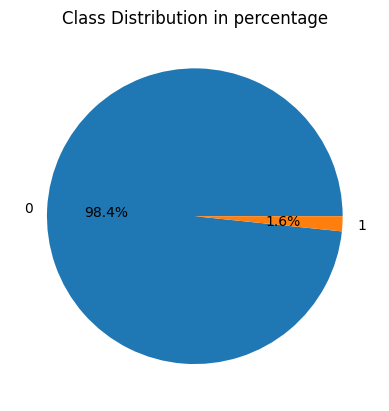

In [ ]:
perce.plot(kind="pie", autopct="%1.1f%%")  
plt.ylabel("")  
plt.title("Class Distribution in percentage")
plt.show()

# y= Dependent variable ,x= Independent variable

In [4]:
x = df.drop("Class", axis=1)
y=df['Class']

In [6]:
x.shape

(21693, 29)

In [ ]:
y.shape

(21693,)

# Handling imbalanced data
- synthetic minority oversampling technique(SMOTE)

In [5]:
SMOTE=SMOTE(random_state=42)
x_smote,y_smote=SMOTE.fit_resample(x,y)

In [ ]:
print(x_smote.shape)
print(y_smote.shape)

(42674, 29)
(42674,)


In [ ]:
y_smote.value_counts()

Class
0    21337
1    21337
Name: count, dtype: int64

the data is now balanced with the class having equal value of fraudulent and non fradulent

In [ ]:
from collections import Counter
print('Orignal dataset shape',Counter(y))
print('Resample dataset shape',Counter(y_smote))

Orignal dataset shape Counter({0: 21337, 1: 356})
Resample dataset shape Counter({0: 21337, 1: 21337})


from these  we can see that the class [1] as added some rows  making the data balanced

In [ ]:
fraud_data=df[df['Class']==0]
legitimate_data=df[df['Class']==1]

<Axes: ylabel='Frequency'>

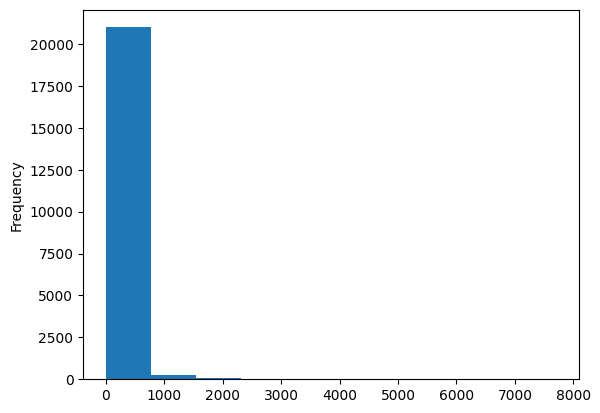

In [ ]:
fraud_data['Amount'].plot(kind='hist')

<Axes: ylabel='Frequency'>

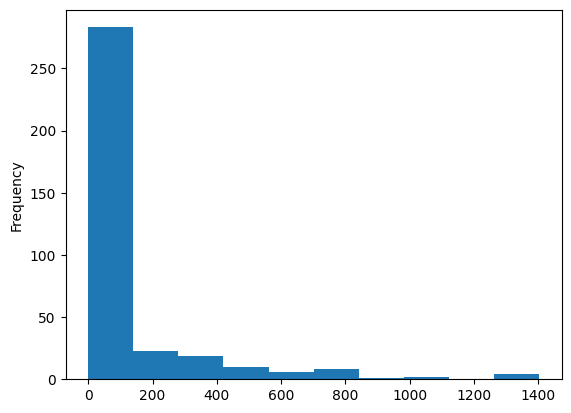

In [ ]:
legitimate_data['Amount'].plot(kind='hist')

<Axes: >

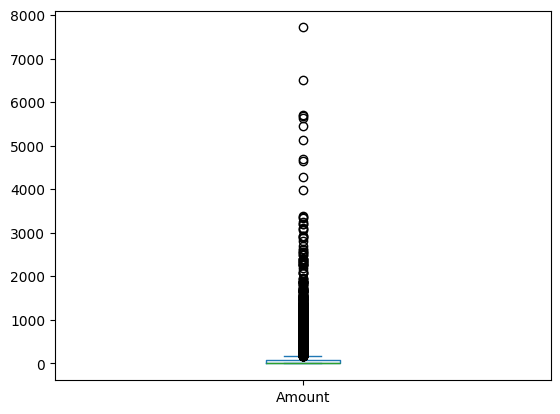

In [ ]:
# box plot
fraud_data['Amount'].plot(kind='box')

<Axes: >

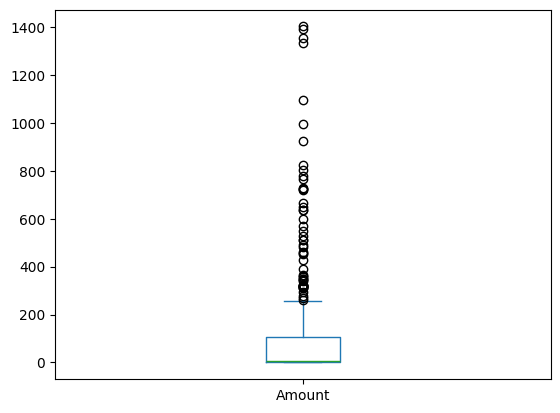

In [ ]:
legitimate_data['Amount'].plot(kind='box')

# correlation matrix in imbalanced data

In [ ]:
corr_imbalanced= df.corr()
corr_imbalanced

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,-0.146151,0.215212,-0.128453,0.170542,0.034279,0.255483,-0.005986,0.148964,0.256063,...,-0.015313,-0.008934,0.001485,0.002638,0.016170,0.010352,0.066218,0.005802,-0.190724,-0.266090
V2,-0.146151,1.000000,-0.208005,0.145315,-0.141299,-0.044490,-0.204274,-0.029483,-0.138545,-0.242308,...,0.039817,-0.012073,0.020345,-0.002385,-0.000587,0.001227,-0.004959,0.026014,-0.466621,0.261974
V3,0.215212,-0.208005,1.000000,-0.215700,0.232629,0.069899,0.353663,-0.032595,0.196321,0.367115,...,-0.014078,-0.019957,-0.003558,0.001377,0.005665,0.000747,0.032973,0.001553,-0.157018,-0.455432
V4,-0.128453,0.145315,-0.215700,1.000000,-0.133877,-0.054986,-0.211180,0.026285,-0.129070,-0.221332,...,0.014703,0.012371,0.019293,-0.019212,0.003659,0.006567,0.018368,0.007570,0.077696,0.367881
V5,0.170542,-0.141299,0.232629,-0.133877,1.000000,0.038777,0.252781,-0.044492,0.132767,0.246547,...,-0.007272,-0.015379,-0.019001,-0.012113,0.009406,0.008009,0.044808,0.018493,-0.352088,-0.240984
V6,0.034279,-0.044490,0.069899,-0.054986,0.038777,1.000000,0.061177,-0.074040,0.027948,0.079684,...,0.001973,0.008930,0.023412,0.000941,-0.010316,0.003422,-0.014990,-0.006293,0.228778,-0.128316
V7,0.255483,-0.204274,0.353663,-0.211180,0.252781,0.061177,1.000000,0.052792,0.200578,0.382375,...,-0.022601,-0.018388,-0.025330,-0.001455,-0.003308,-0.001871,0.028582,0.007204,0.295881,-0.423161
V8,-0.005986,-0.029483,-0.032595,0.026285,-0.044492,-0.074040,0.052792,1.000000,-0.010445,-0.019343,...,-0.059248,0.028017,-0.055981,0.013667,0.023980,0.000253,0.046126,-0.016790,-0.080338,0.031553
V9,0.148964,-0.138545,0.196321,-0.129070,0.132767,0.027948,0.200578,-0.010445,1.000000,0.185249,...,0.017711,-0.017730,-0.008915,0.003486,-0.016985,-0.014381,-0.015716,-0.002809,-0.047762,-0.276200
V10,0.256063,-0.242308,0.367115,-0.221332,0.246547,0.079684,0.382375,-0.019343,0.185249,1.000000,...,-0.000795,-0.020438,-0.010762,0.012513,-0.009904,-0.013282,-0.010233,-0.012577,-0.079970,-0.517501


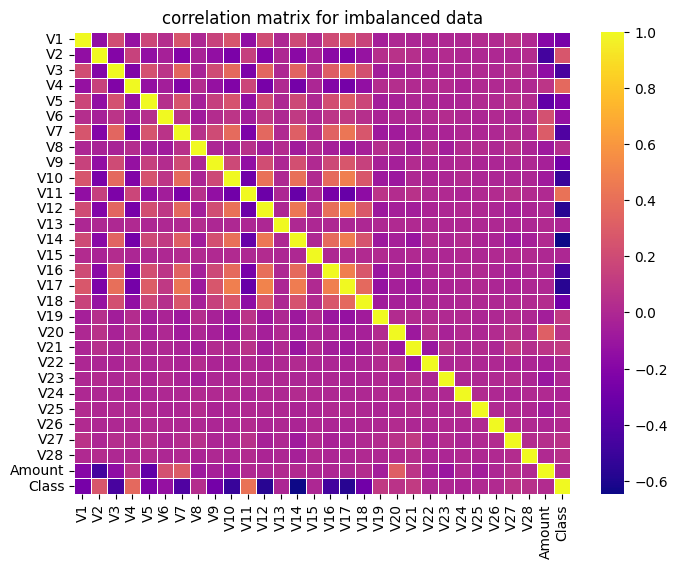

In [ ]:
corr_imbalanced=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_imbalanced,annot=False,cmap='plasma',linewidths=0.5)
plt.title( 'correlation matrix for imbalanced data')
plt.show()

# correlation of balanced matrix

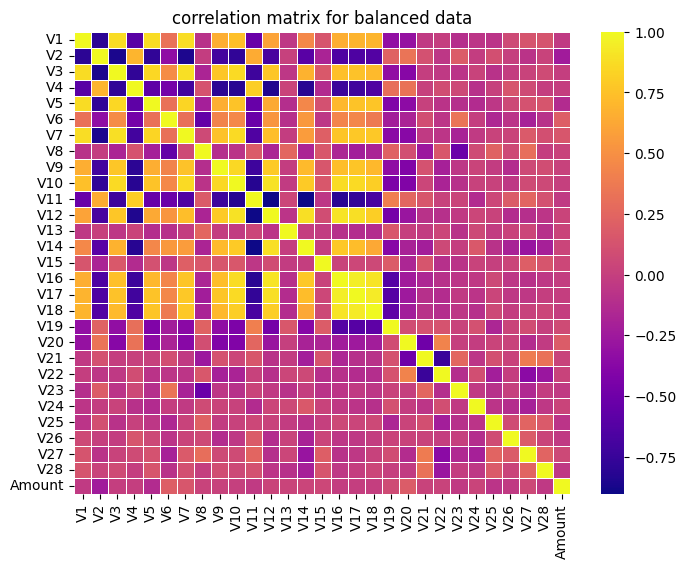

In [ ]:
corr_balanced=x_smote.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_balanced,annot=False,cmap='plasma',linewidths=0.5)
plt.title('correlation matrix for balanced data')
plt.show()

# countplot of imbalanced data

C:\Users\GASTO\AppData\Local\Temp\ipykernel_6660\481272890.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class',data=df,palette=custom_palette)
C:\Users\GASTO\AppData\Local\Temp\ipykernel_6660\481272890.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='Class',data=df,palette=custom_palette)


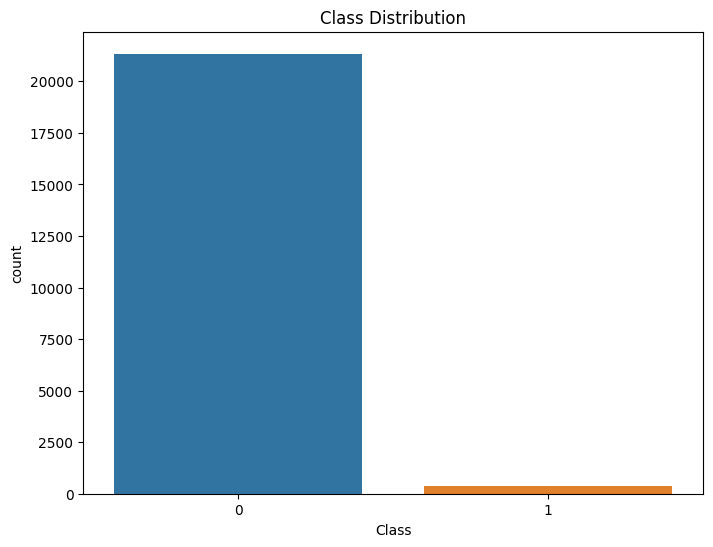

In [ ]:
custom_palette=sns.color_palette()
plt.figure(figsize=(8,6))
sns.countplot(x='Class',data=df,palette=custom_palette)
plt.title('Class Distribution')
plt.show()

# countplot of balanced data

C:\Users\GASTO\AppData\Local\Temp\ipykernel_6660\1276111307.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_smote,palette=custom_palette)
C:\Users\GASTO\AppData\Local\Temp\ipykernel_6660\1276111307.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=y_smote,palette=custom_palette)


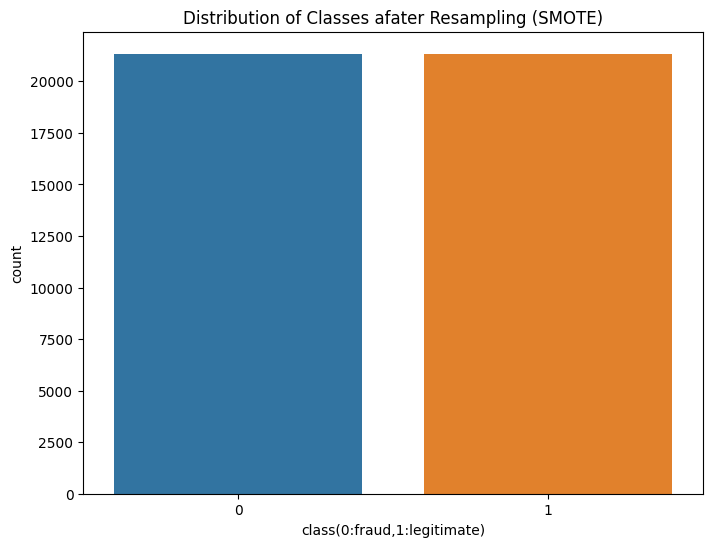

In [ ]:
custom_palette=sns.color_palette()
plt.figure(figsize=(8,6))
sns.countplot(x=y_smote,palette=custom_palette)
plt.title('Distribution of Classes afater Resampling (SMOTE)')
plt.xlabel('class(0:fraud,1:legitimate)')
plt.ylabel('count')
plt.show()

# split Dataset for test and train

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)

# standardize the data

In [8]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# model Building

1.Logistic Regression

In [ ]:
log_reg=LogisticRegression(random_state=42)
log_reg.fit(x_train_scaled,y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred_logistic=log_reg.predict(x_test_scaled)

In [ ]:
classification_rep_logistic=classification_report(y_test,y_pred_logistic)

print(classification_rep_logistic)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4292
           1       0.98      0.93      0.95      4243

    accuracy                           0.96      8535
   macro avg       0.96      0.96      0.96      8535
weighted avg       0.96      0.96      0.96      8535



# class [0]

- precision(0.94)-   the model identifies 94% correctly and doesn't make too many false positive error for this class.

- recall(0.98)- the model predicted  98% of actual instances implying that it identified almost all the instances.

- harmonic mean of the precision and recall that provides the balance of the two indicated a 96% hence strong overall performance of that class.

# class [1]

-in recall the actual classs prediction was slightly low with 93% correctly predicted indicating the model missed some instances.

# general overview
- the model performed quite well on the f1 score ,precision ,recall although there was a slight lower recall for class 1 indicating small bias 


In [ ]:
confusion_matrix_logistic=confusion_matrix(y_test,y_pred_logistic)
confusion_matrix_logistic

array([[4205,   87],
       [ 287, 3956]])

In [ ]:
confusion_matrix_df=pd.DataFrame(confusion_matrix_logistic,
                                 columns=['Predicted Negative(0)','predicted Positive(1)'],
                                 index=['Actual Negative(0)','Actual postive(1)'])
print(confusion_matrix_df)


                    Predicted Negative(0)  predicted Positive(1)
Actual Negative(0)                   4205                     87
Actual postive(1)                     287                   3956


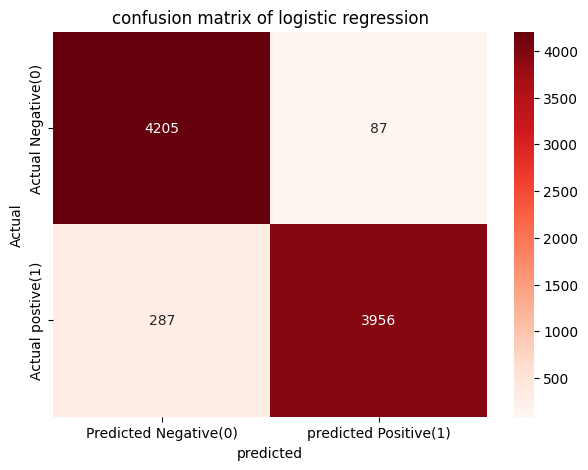

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix_df,annot=True,fmt='d',cmap='Reds')
plt.title('confusion matrix of logistic regression')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

2.KNN

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_KNN = knn_model.predict(x_test_scaled)

In [ ]:
classification_rep_KNN = classification_report(y_test, y_pred_KNN)
print(classification_rep_KNN)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4292
           1       0.98      1.00      0.99      4243

    accuracy                           0.99      8535
   macro avg       0.99      0.99      0.99      8535
weighted avg       0.99      0.99      0.99      8535



# class[0]

- the model is nearly perfect in predicting class 0 with a precision of 1.00,i.e, it does not falsely label any instances theclass .

-  recall is slightly less than perfect at 0.98, showing  that a small number of actual class instances were incorrectly classified as class 1.

# class[1]

- The model has slightly lower precision for class 1 at 0.98, indicating there were a few false positives.
 
- a perfect recall of 1.00, meaning it correctly identified all instances of class 1.

In [ ]:
confusion_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)
confusion_matrix_KNN

array([[4209,   83],
       [   0, 4243]])

In [ ]:
confusion_matrix_df = pd.DataFrame(
    confusion_matrix_KNN,
    columns=["Predicted Negative(0)", "predicted Positive(1)"],
    index=["Actual Negative(0)", "Actual postive(1)"],
)
print(confusion_matrix_df)

                    Predicted Negative(0)  predicted Positive(1)
Actual Negative(0)                   4209                     83
Actual postive(1)                       0                   4243


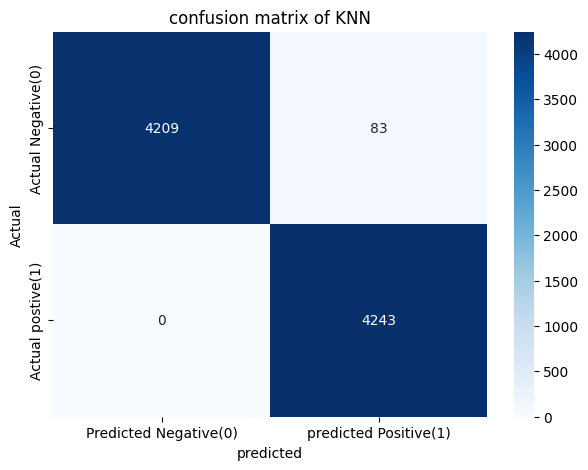

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title("confusion matrix of KNN")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

3.DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_clf = clf.predict(x_test_scaled)

In [ ]:
classification_rep_clf= classification_report(y_test, y_pred_clf)
print(classification_rep_clf)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4292
           1       0.98      0.99      0.99      4243

    accuracy                           0.99      8535
   macro avg       0.99      0.99      0.99      8535
weighted avg       0.99      0.99      0.99      8535



In [ ]:
confusion_matrix_clf = confusion_matrix(y_test, y_pred_clf)
confusion_matrix_clf

array([[4223,   69],
       [  55, 4188]])

In [ ]:
confusion_matrix_df = pd.DataFrame(
    confusion_matrix_clf,
    columns=["Predicted Negative(0)", "predicted Positive(1)"],
    index=["Actual Negative(0)", "Actual postive(1)"],
)
print(confusion_matrix_df)

                    Predicted Negative(0)  predicted Positive(1)
Actual Negative(0)                   4223                     69
Actual postive(1)                      55                   4188


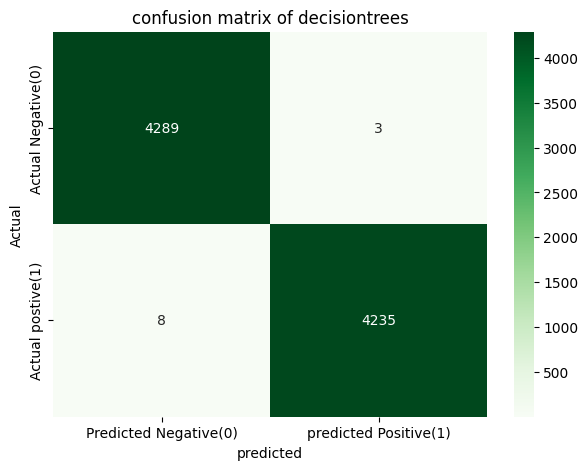

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix_df, annot=True, fmt="d", cmap="Greens")
plt.title("confusion matrix of decisiontrees")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

# Ensembled methods
- Random forest an example of bagging that helps reduce variance 

In [9]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = model_rf.predict(x_test_scaled)

In [ ]:
classification_rep_rf = classification_report(y_test, y_pred_rf)
print(classification_rep_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4292
           1       1.00      1.00      1.00      4243

    accuracy                           1.00      8535
   macro avg       1.00      1.00      1.00      8535
weighted avg       1.00      1.00      1.00      8535



- in both class[0],class[1], the model seemed to predict all the positive  cases  at 100% in both the positive class and the actual 
class with an accuracy score of 100% meaning the model was performimg quite well in both classes

In [ ]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
confusion_matrix_rf

array([[4289,    3],
       [   8, 4235]])

In [ ]:
confusion_matrix_df = pd.DataFrame(
    confusion_matrix_rf,
    columns=["Predicted Negative(0)", "predicted Positive(1)"],
    index=["Actual Negative(0)", "Actual postive(1)"],
)
print(confusion_matrix_df)

                    Predicted Negative(0)  predicted Positive(1)
Actual Negative(0)                   4289                      3
Actual postive(1)                       8                   4235


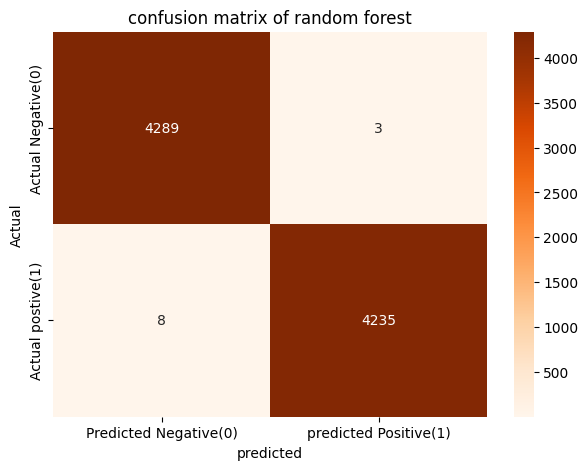

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix_df, annot=True, fmt="d", cmap="Oranges")
plt.title("confusion matrix of random forest")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

# best model
- In my model implementation Decisiontrees and R andom forest performed better bt required hyperperameter tuning for a better visualization

# HYPERPARAMETER TUNING


In [ ]:

param_grid = {
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 5, 10],
    "max_features": [None, "sqrt", "log2"],
    "criterion": ["gini", "entropy"],
}

In [ ]:
grid_search = GridSearchCV(
    estimator=clf, param_grid=param_grid, scoring="f1", 
)


In [ ]:
grid_search.fit(x_train_scaled, y_train)

c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='f1')

In [ ]:
best_params = grid_search.best_params_

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)

In [ ]:
test_tr = classification_report(y_pred, y_test)
print(f"test_tr:{test_tr}")

test_tr:              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4261
           1       0.99      0.98      0.98      4274

    accuracy                           0.98      8535
   macro avg       0.98      0.98      0.98      8535
weighted avg       0.98      0.98      0.98      8535



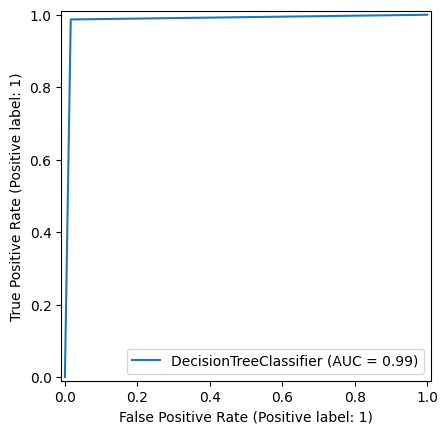

In [ ]:
RocCurveDisplay.from_estimator(clf, x_test_scaled, y_test)

# Random forest 

In [16]:
param_grid = {
    #'n_estimators': [50,30],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    #'max_features': ['sqrt', None]
}

In [17]:
grid_search = GridSearchCV(
    estimator=model_rf, param_grid=param_grid, scoring="f1",n_jobs=-1,cv=5
)

In [18]:
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='f1')

In [19]:
best_params = grid_search.best_params_

In [20]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)

In [21]:
test_tr = classification_report(y_pred, y_test)
print(f"test_tr:{test_tr}")

test_tr:              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4296
           1       1.00      1.00      1.00      4239

    accuracy                           1.00      8535
   macro avg       1.00      1.00      1.00      8535
weighted avg       1.00      1.00      1.00      8535



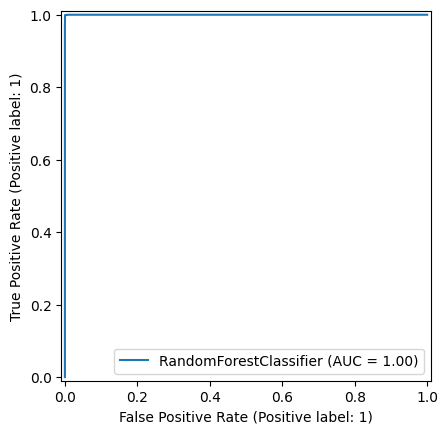

In [22]:
RocCurveDisplay.from_estimator(model_rf, x_test_scaled, y_test)

In [23]:
y_true = y_test
y_score_rf = model_rf.predict_proba(x_test_scaled)[:, 1]

In [24]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_true, y_score_rf)
youden_index_rf = tpr_rf - fpr_rf
best_threshold_index_rf = np.argmax(youden_index_rf)
best_threshold_rf = thresholds_rf[best_threshold_index_rf]
print(f"Best Threshold by Youden's Index: {best_threshold_rf:.2f}")
print(f"Corresponding TPR (Sensitivity): {tpr_rf[best_threshold_index_rf]:.2f}")
print(f"Corresponding FPR: {fpr_rf[best_threshold_index_rf]:.2f}")

Best Threshold by Youden's Index: 0.43
Corresponding TPR (Sensitivity): 1.00
Corresponding FPR: 0.00


In [26]:
precision, recall, thresholds = precision_recall_curve(y_true, y_score_rf)

In [27]:
pr_auc = auc(recall, precision)
pr_auc

np.float64(0.9999876017490319)

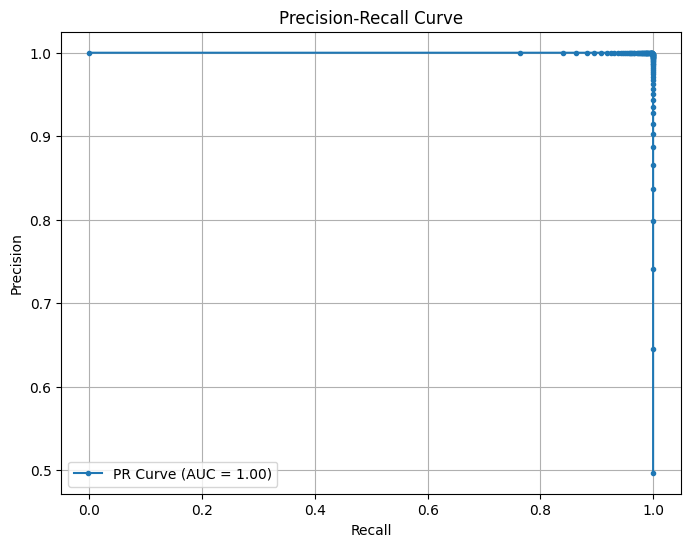

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker=".", label=f"PR Curve (AUC = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Precision at optimal threshold: {precision[optimal_idx]:.2f}")
print(f"Recall at optimal threshold: {recall[optimal_idx]:.2f}")

Optimal Threshold: 0.43
Precision at optimal threshold: 1.00
Recall at optimal threshold: 1.00


- Optimal Threshold refers to thr probability used to classify samples as positive.
- 0.43 means that if the predicted probability is greater than or equal to ,the instance is classified as positive.
-Precision indicates the true postive predictions among all positive predictions and from our results it shows that all instances predicted as positive were indeed positive.
- Recall indicates a proportion of actual postives that were correctly identified and from our result yhe model classified all postive instances correctly. 